In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-03.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

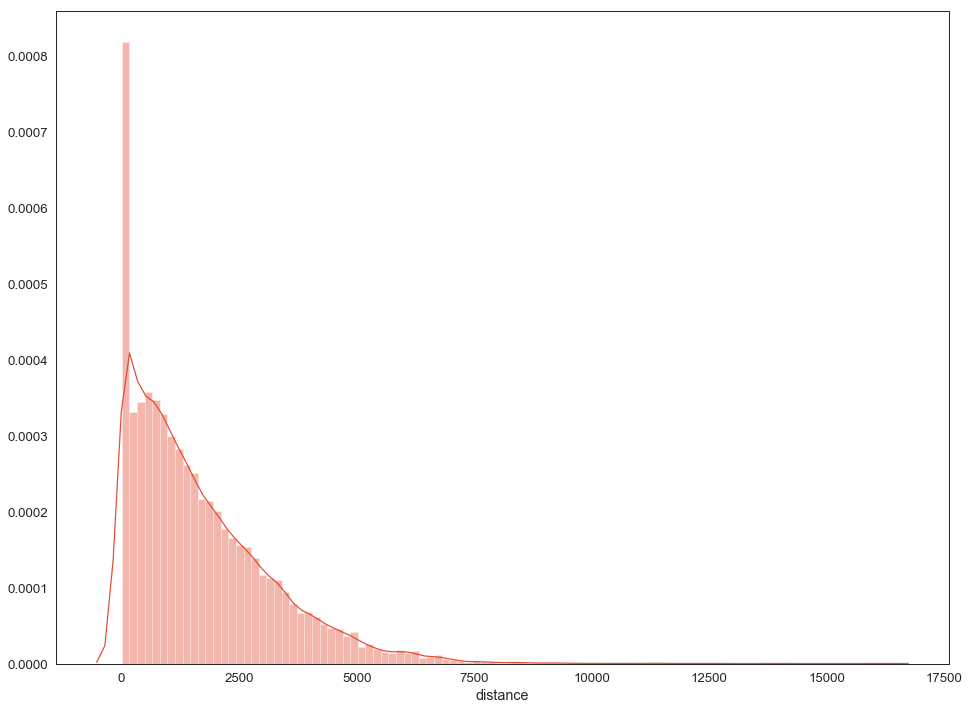

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 100)

### Droping 1 minute rides

In [5]:
dfc = df[df.ride_time != 1]

In [6]:
distance = dfc["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
beta,2915.397307,-1.058583e+06,inf,3.380142e-08
gamma,2467.231888,-1.049874e+06,inf,4.248296e-08
norm,4440.012071,-9.795031e+05,inf,2.688486e-07
lognorm,2517.789174,-9.272743e+05,inf,1.056854e-06
burr,2320.457529,-9.195568e+05,inf,1.293478e-06


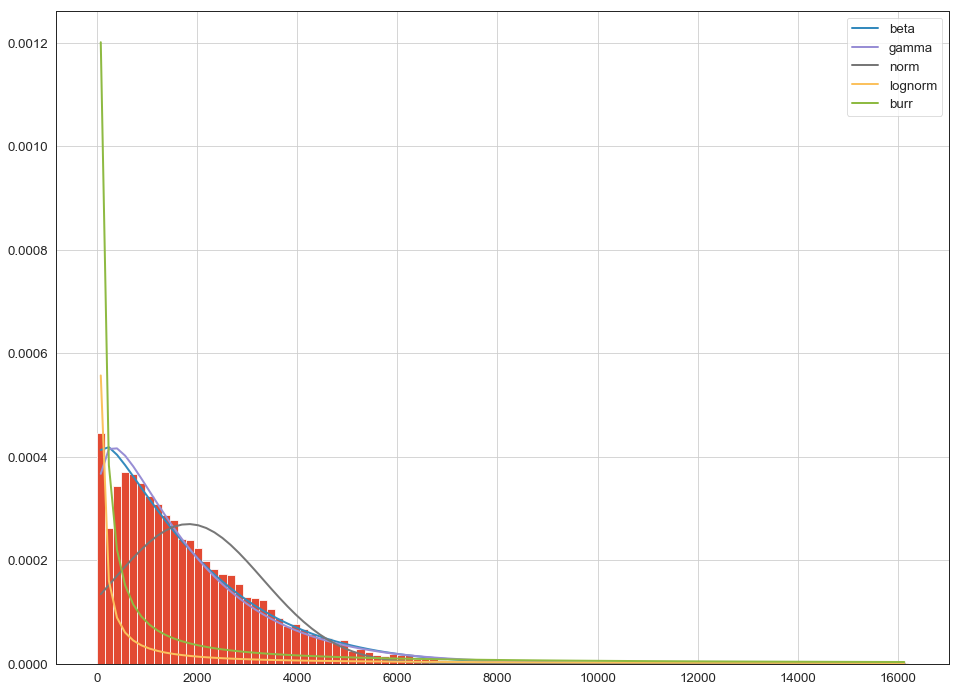

In [7]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [8]:
f.get_best(method = 'sumsquare_error')

{'beta': (1.0814457676577893,
  8.738072580262799,
  -0.028231397832869126,
  16522.77870840419)}

In [9]:
f.get_best(method = 'aic')

{'burr': (0.3068322719360037,
  3.0428905667389405,
  -0.00011904287912895155,
  2.0678026293708647)}

In [10]:
f.get_best(method = 'bic')

{'beta': (1.0814457676577893,
  8.738072580262799,
  -0.028231397832869126,
  16522.77870840419)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,2915.397307,-1.058583e+06,inf,3.380142e-08
norm,4440.012071,-9.795031e+05,inf,2.688486e-07
bradford,1974.796598,-9.437550e+05,inf,6.860916e-07
burr,2320.457529,-9.195568e+05,inf,1.293478e-06
alpha,3327.150798,-9.185960e+05,inf,1.326841e-06


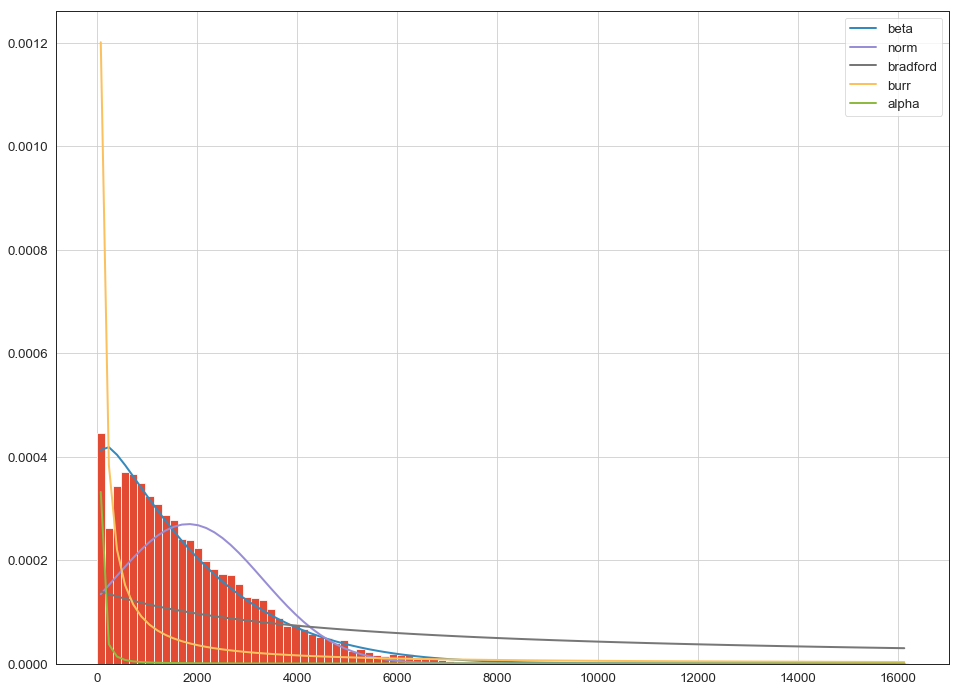

In [11]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi,3055.652732,-1.074565e+06,inf,2.223830e-08
chi2,2467.231887,-1.049874e+06,inf,4.248296e-08
expon,2391.388888,-1.025004e+06,inf,8.155919e-08
dgamma,2959.025481,-9.847200e+05,inf,2.344189e-07
cosine,2104.724332,-9.306595e+05,inf,9.673751e-07


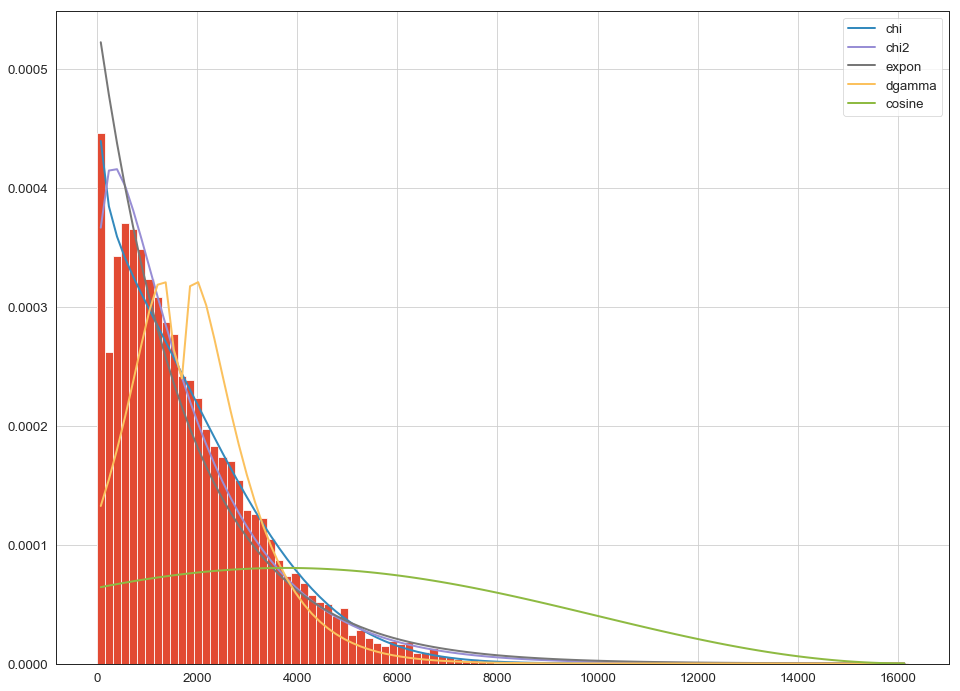

In [12]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,2467.231888,-1.049874e+06,inf,4.248296e-08
exponnorm,2393.255431,-1.024954e+06,inf,8.164338e-08
f,2394.008596,-1.019737e+06,inf,9.358484e-08
fatiguelife,2417.059712,-9.367576e+05,inf,8.242286e-07
fisk,2466.751412,-9.283741e+05,inf,1.026819e-06


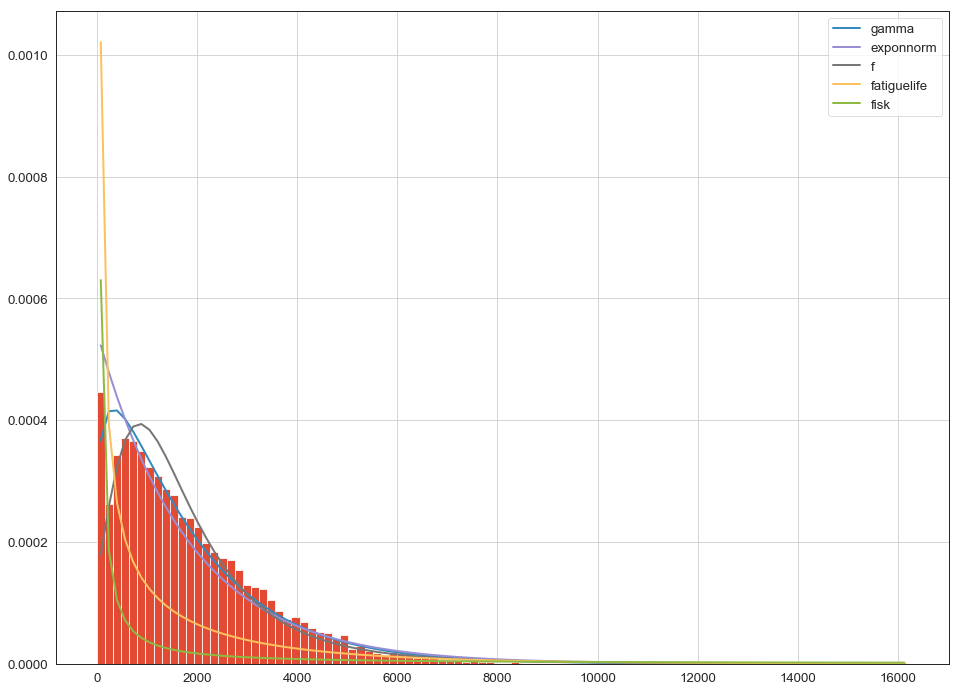

In [13]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
genexpon,2397.817806,-1.024738e+06,inf,8.206220e-08
gengamma,2394.660389,-1.024746e+06,inf,8.206771e-08
loggamma,4482.629847,-9.785148e+05,inf,2.758285e-07
levy,2164.328434,-9.719801e+05,inf,3.274598e-07
lognorm,2517.789174,-9.272743e+05,inf,1.056854e-06


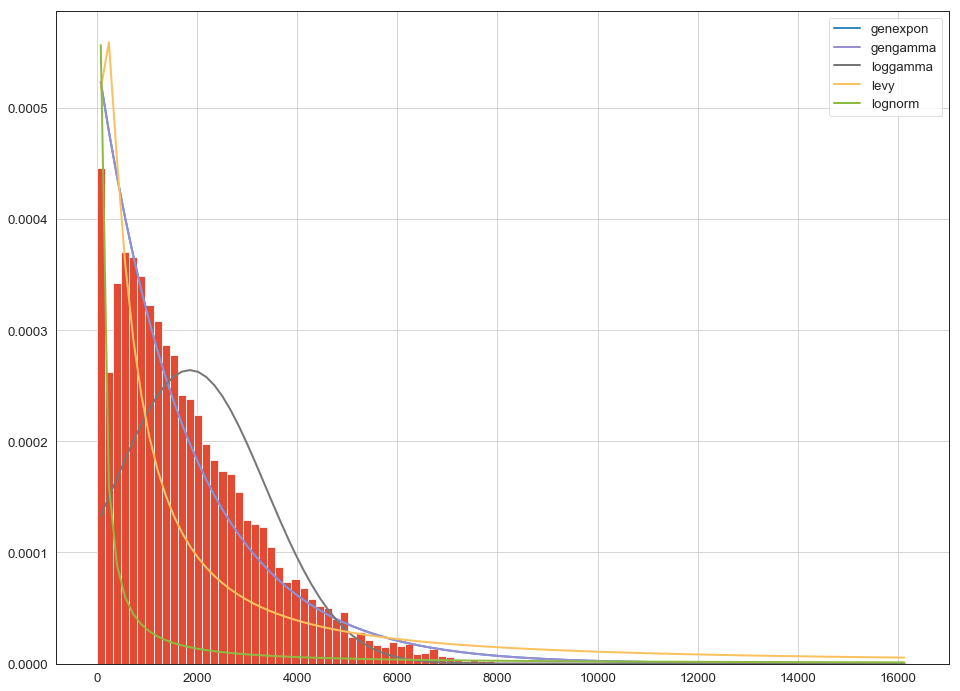

In [14]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,2467.231928,-1.049874e+06,inf,4.248297e-08
t,2814.575792,-9.907605e+05,inf,2.000884e-07
logistic,3012.041793,-9.843967e+05,inf,2.364795e-07
powerlaw,2019.146505,-9.560239e+05,inf,4.973924e-07
pareto,2352.809545,-9.190510e+05,inf,1.311107e-06


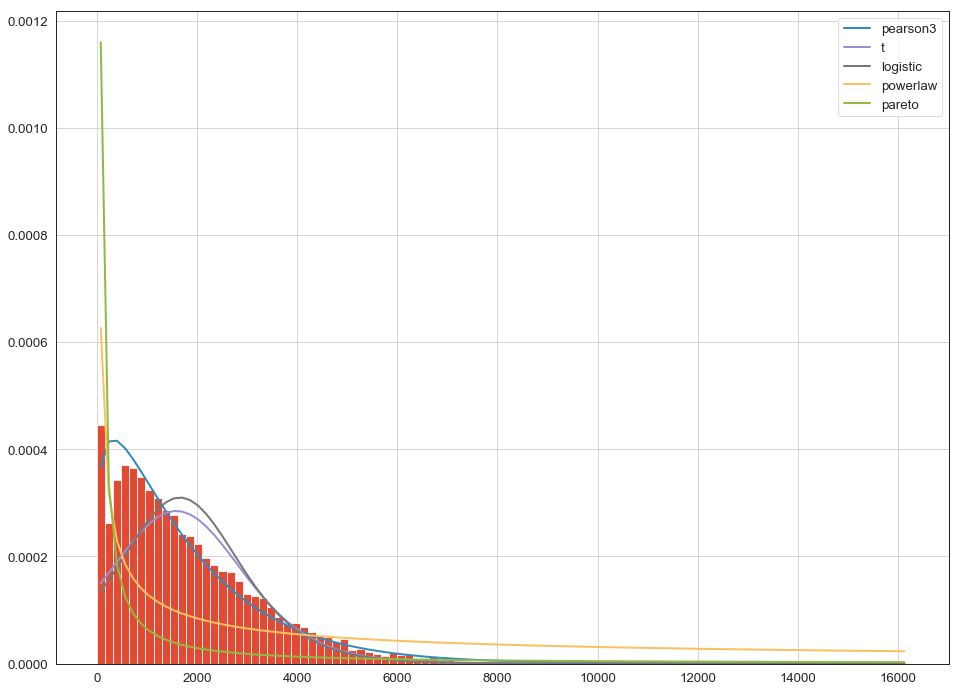

In [15]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'])
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
chi,3055.652732,-1.074565e+06,inf,2.223830e-08
beta,2915.397307,-1.058583e+06,inf,3.380142e-08
gamma,2467.231888,-1.049874e+06,inf,4.248296e-08
pearson3,2467.231928,-1.049874e+06,inf,4.248297e-08
genexpon,2397.817806,-1.024738e+06,inf,8.206220e-08


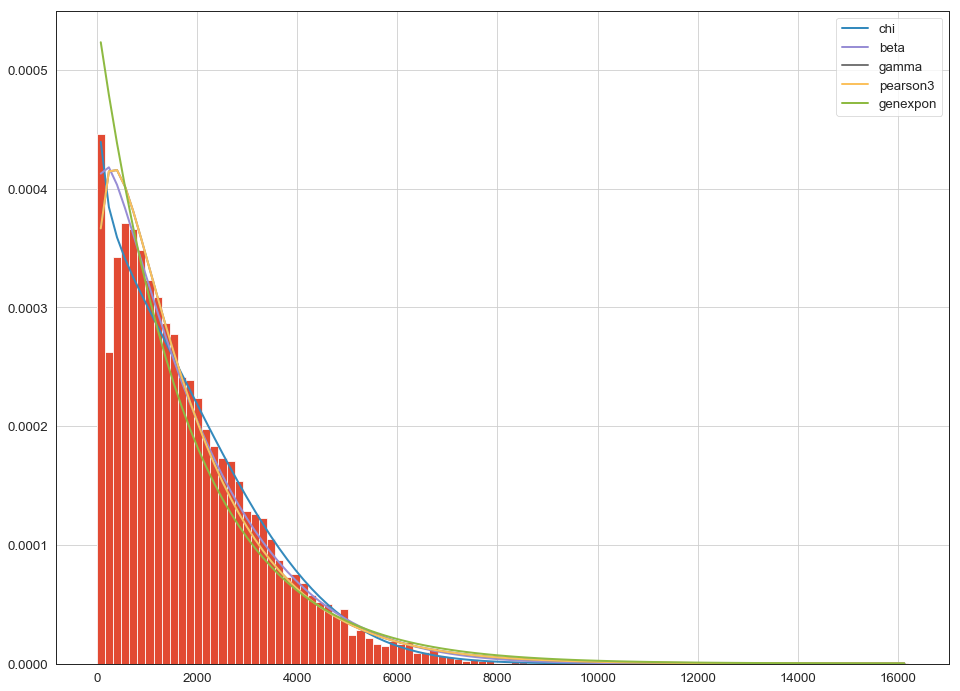

In [38]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma','genexpon','pearson3'])
f.fit()
f.summary()

### 5 best distributions without 1 min drop

In [17]:
distance2 = df["distance"].values

,aic,bic,kl_div,sumsquare_error
chi,2803.205051,-1.168556e+06,inf,5.175694e-08
beta,2461.602810,-1.142793e+06,inf,9.474279e-08
gamma,2414.583106,-1.140828e+06,inf,9.924242e-08
pearson3,2459.385997,-1.135415e+06,inf,1.126894e-07
genexpon,2618.444336,-1.126977e+06,inf,1.373114e-07


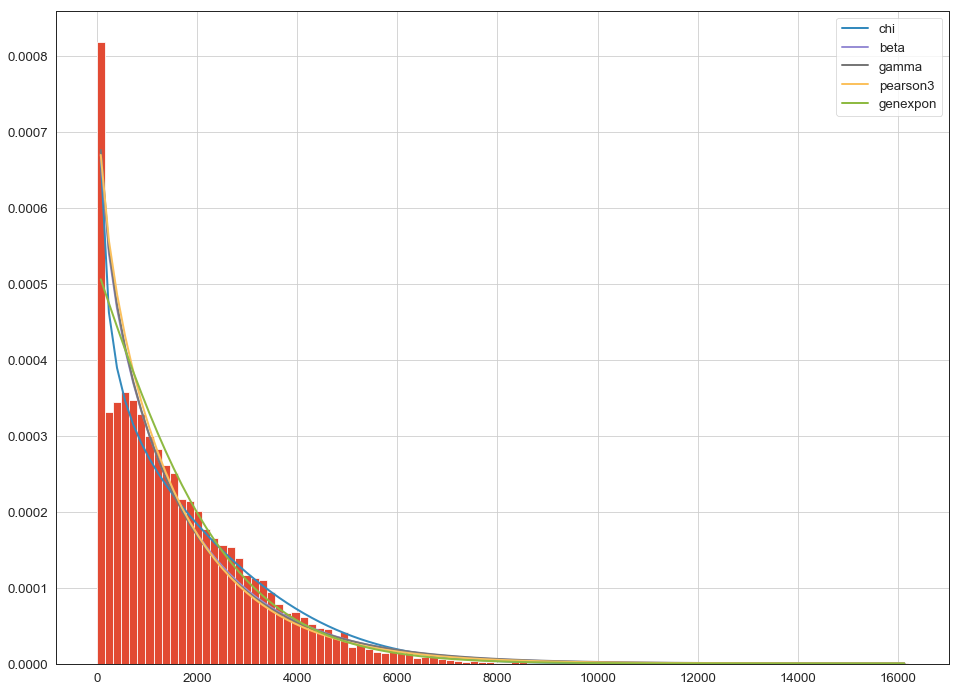

In [41]:
f = Fitter(distance2,
           distributions=['beta','chi','gamma','genexpon','pearson3'])
f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

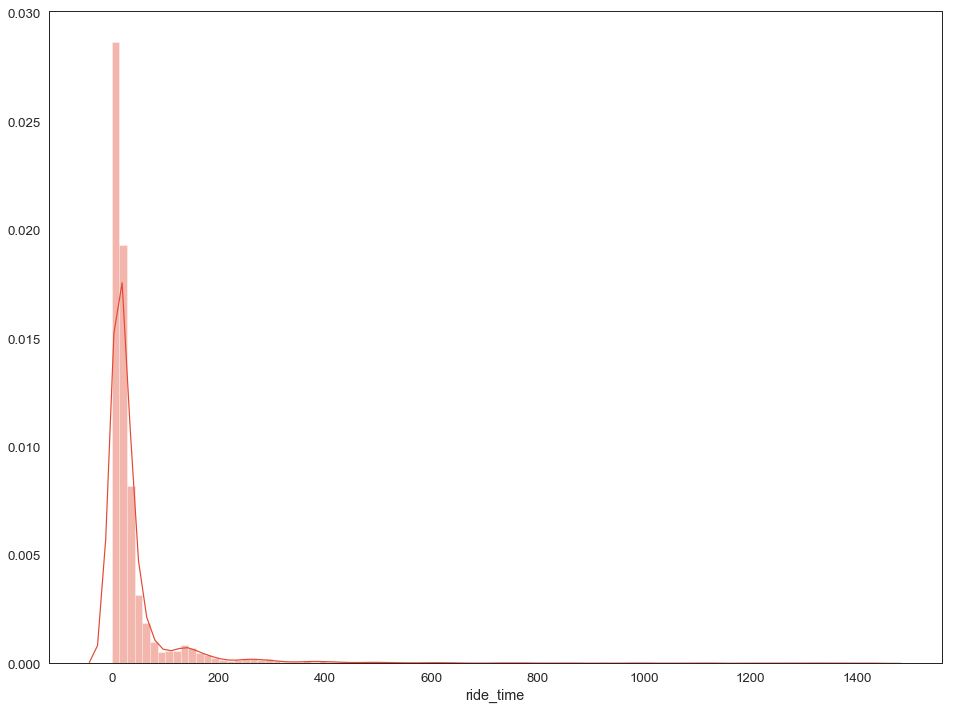

In [19]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 100)

### Using data without 1 min rides

In [20]:
rides = dfc["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
lognorm,2398.736308,-784256.394361,inf,0.000045
gamma,3038.049003,-735042.953451,inf,0.000163
beta,3203.775806,-731433.756107,inf,0.000179
burr,1904.397378,-713916.510516,inf,0.000284
norm,5156.660452,-672060.800420,inf,0.000851


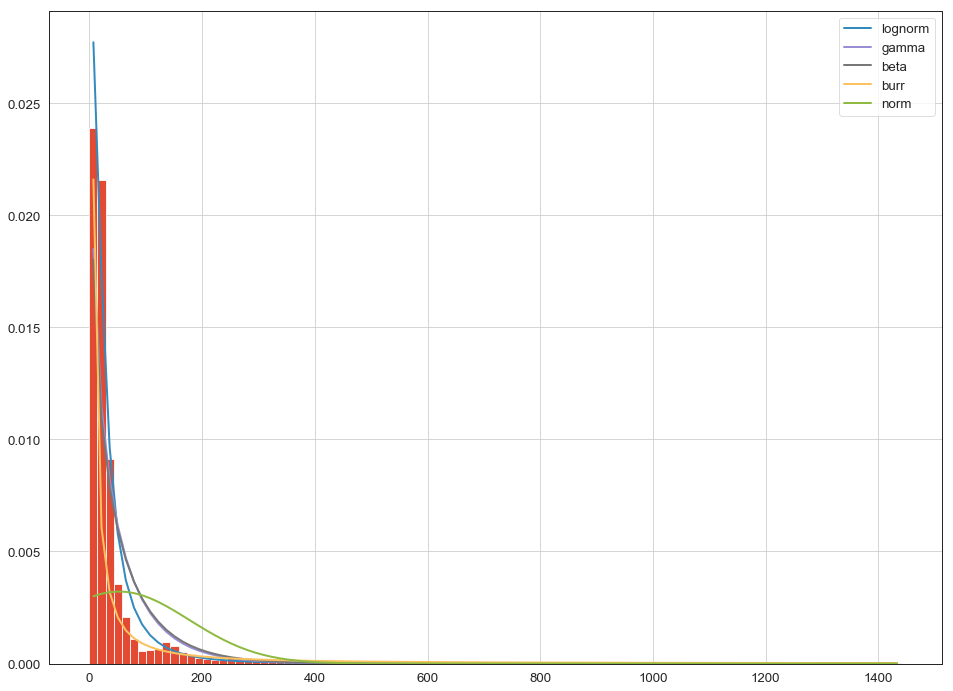

In [21]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [22]:
f.get_best(method = 'sumsquare_error')

{'lognorm': (1.0617106461101495, -0.007401894914137461, 23.76958667663196)}

In [23]:
f.get_best(method = 'aic')

{'burr': (0.5052454714456321,
  2.745055670640186,
  -0.00012851723531690269,
  0.6500376226853277)}

In [24]:
f.get_best(method = 'bic')

{'lognorm': (1.0617106461101495, -0.007401894914137461, 23.76958667663196)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,3203.775806,-731433.756107,inf,0.000179
burr,1904.397378,-713916.510516,inf,0.000284
bradford,1603.103594,-684122.464135,inf,0.000620
norm,5156.660452,-672060.800420,inf,0.000851
alpha,2264.456931,-613893.467587,inf,0.003907


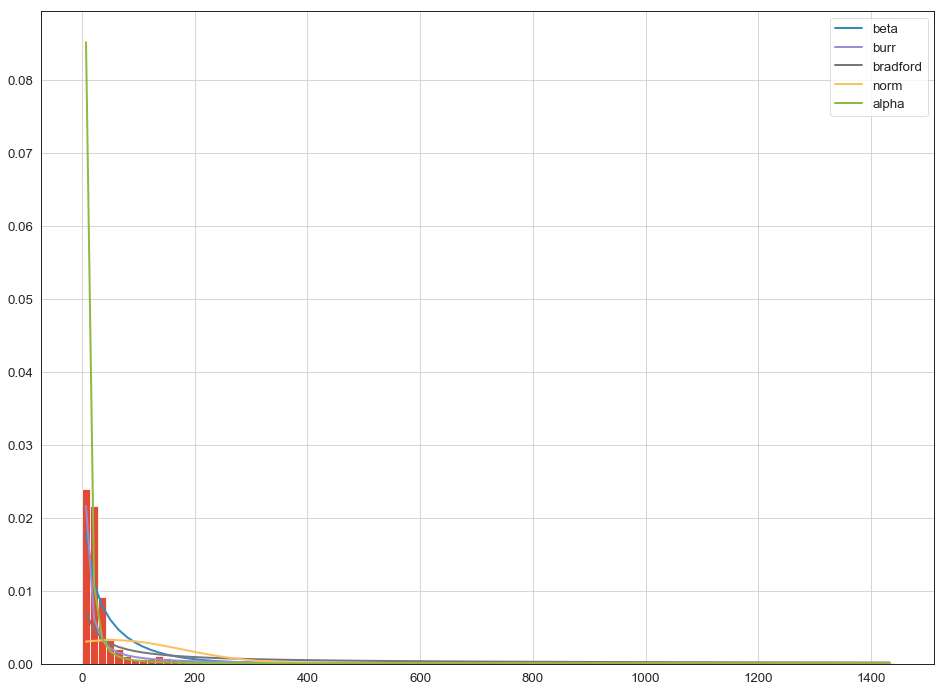

In [25]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
expon,3518.479237,-730255.043120,inf,0.000185
dgamma,2826.507610,-708017.552133,inf,0.000331
chi,2970.853889,-704659.068699,inf,0.000362
chi2,1781.263483,-700859.955772,inf,0.000400
cosine,1650.671677,-663392.859954,inf,0.001068


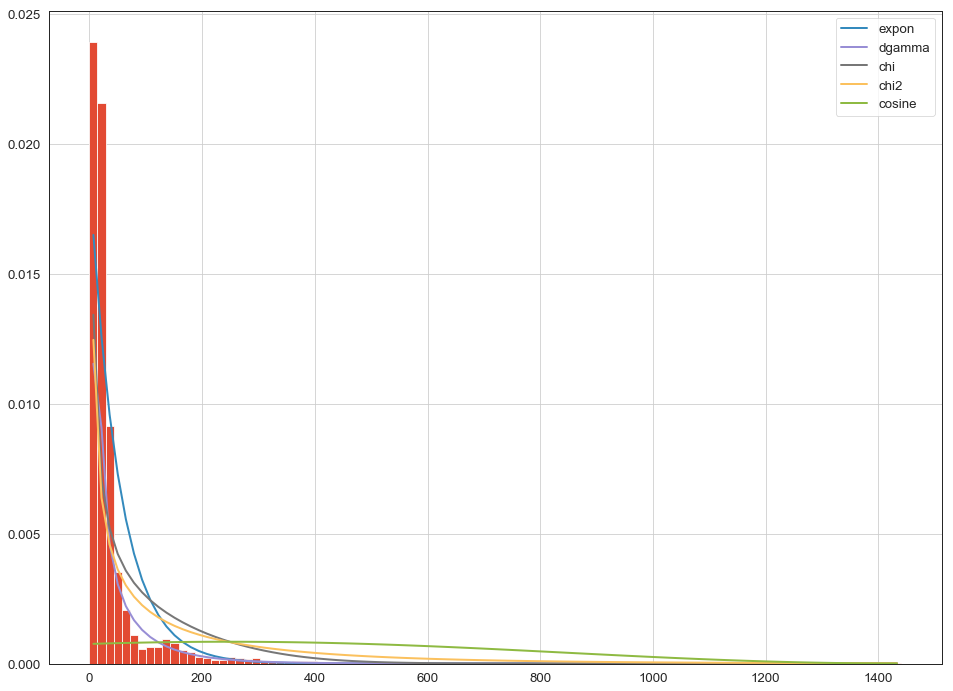

In [26]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
fatiguelife,2622.064411,-759697.673216,inf,0.000085
exponnorm,3692.387010,-740988.304504,inf,0.000140
gamma,3038.049003,-735042.953451,inf,0.000163
fisk,2071.490565,-709157.898062,inf,0.000322
f,1935.266192,-697671.437061,inf,0.000434


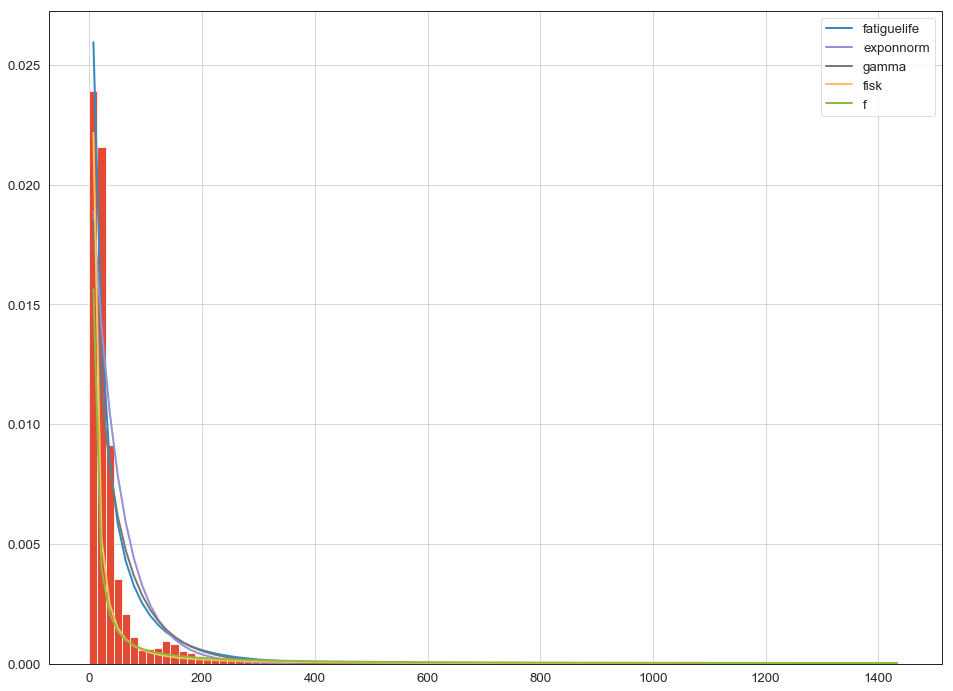

In [27]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,2398.736308,-784256.394361,inf,0.000045
gengamma,2608.782202,-742937.836120,inf,0.000133
levy,1802.699977,-740670.549939,inf,0.000141
genexpon,3524.480244,-730223.428179,inf,0.000185
loggamma,5151.284450,-671648.515433,inf,0.000860


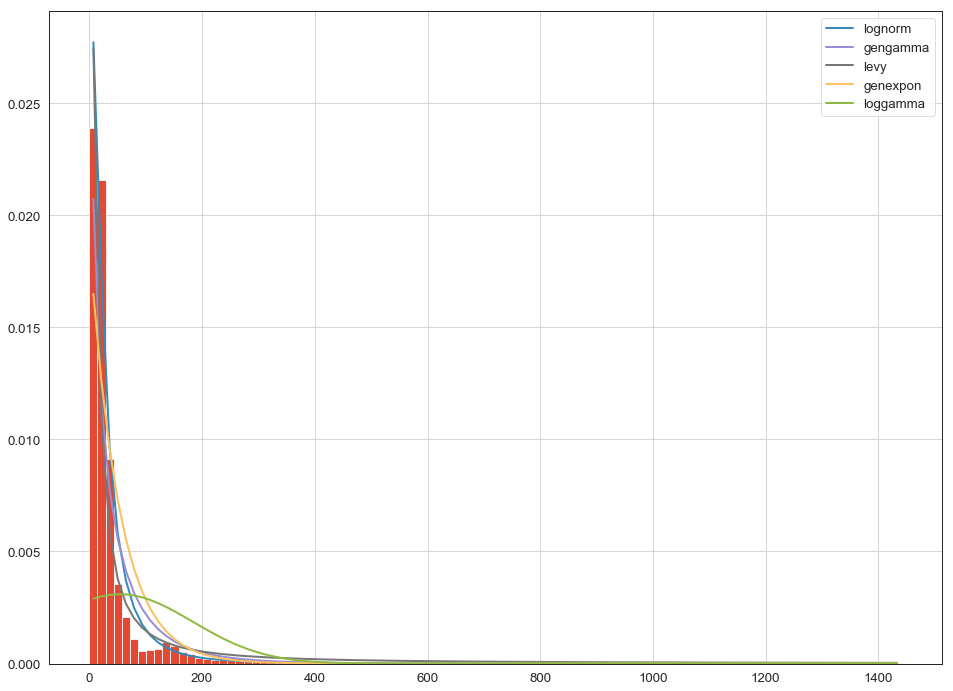

In [28]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pareto,2181.077671,-764960.399507,inf,0.000074
t,2235.939312,-752199.729778,inf,0.000104
pearson3,3151.976745,-739078.349614,inf,0.000147
logistic,4889.075588,-688620.618308,inf,0.000551
powerlaw,1589.190447,-686799.784296,inf,0.000578


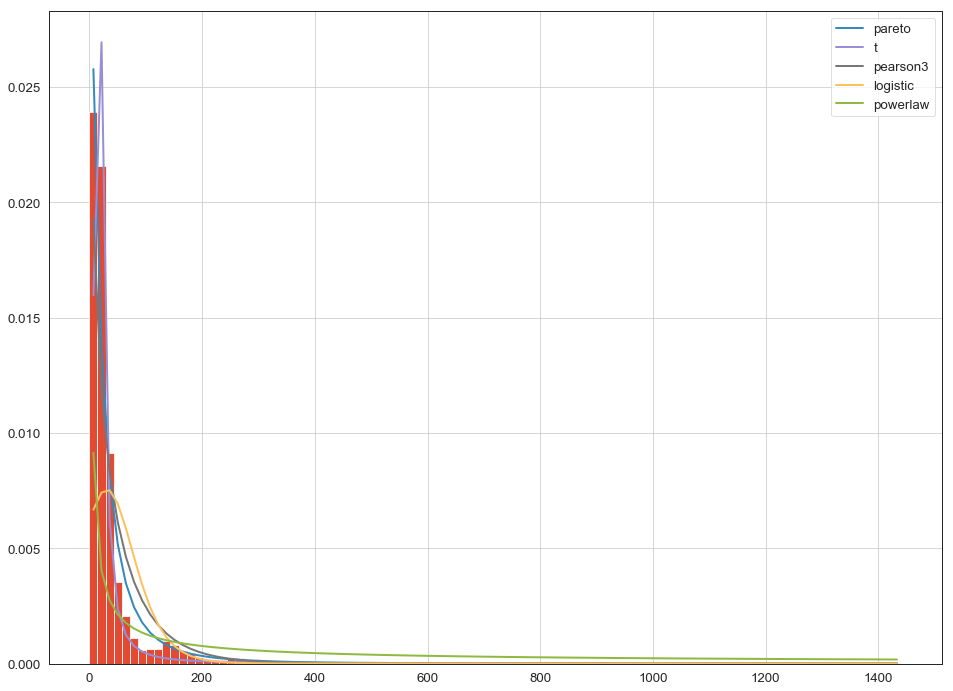

In [29]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'])
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
lognorm,2398.736308,-784256.394361,inf,0.000045
pareto,2181.077671,-764960.399507,inf,0.000074
fatiguelife,2622.064411,-759697.673216,inf,0.000085
beta,3203.775806,-731433.756107,inf,0.000179
expon,3518.479237,-730255.043120,inf,0.000185


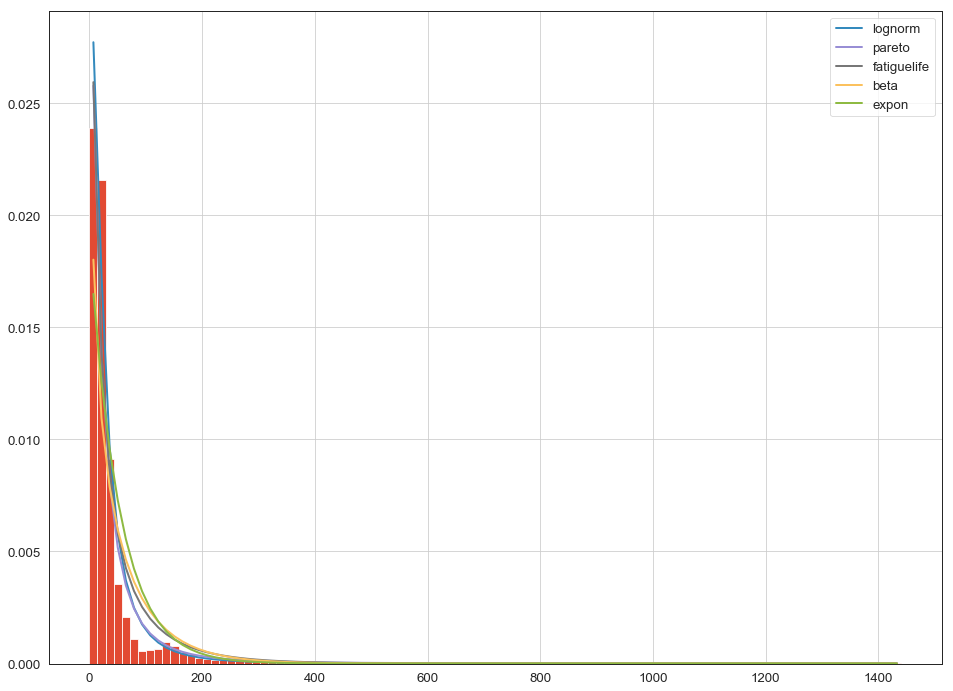

In [39]:
f = Fitter(rides,
           distributions= ['beta','expon','fatiguelife','lognorm','pareto'])
f.fit()
f.summary()

### 5 distributions without 1 min drop

In [31]:
rides2 = df["ride_time"].values

,aic,bic,kl_div,sumsquare_error
lognorm,2179.709866,-868599.473092,inf,0.000059
fatiguelife,2551.171191,-854541.281852,inf,0.000082
beta,2955.627604,-824004.905495,inf,0.000169
pareto,1915.068837,-817274.294525,inf,0.000198
expon,3807.363147,-817110.845651,inf,0.000198


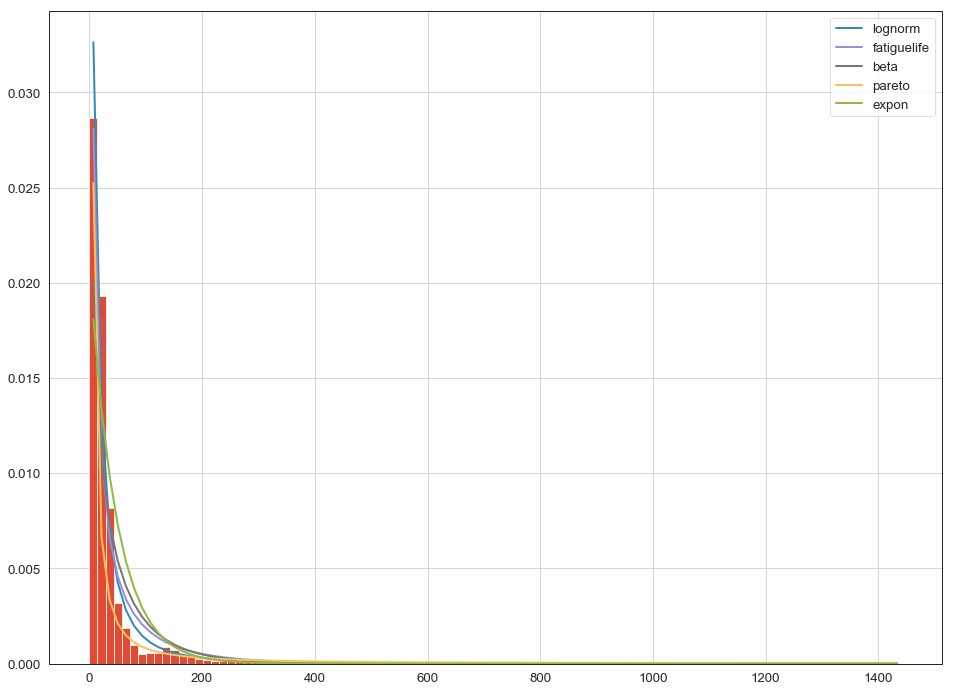

In [40]:
f = Fitter(rides2,
           distributions=['beta','expon','fatiguelife','lognorm','pareto'])
f.fit()
f.summary()

In [33]:
f.get_best(method = 'sumsquare_error')

{'lognorm': (1.3748018085797136, -0.0953418581475747, 17.325601434269267)}

In [34]:
f.get_best(method = 'aic')

{'fisk': (0.7380264890392845, -6.549017947736138e-25, 2.998253915205119)}

In [35]:
f.get_best(method = 'bic')

{'lognorm': (1.3748018085797136, -0.0953418581475747, 17.325601434269267)}

# Appendix

,aic,bic,kl_div,sumsquare_error
beta,2461.602810,-1.142793e+06,inf,9.474279e-08
gamma,2414.583106,-1.140828e+06,inf,9.924242e-08
burr,2353.271165,-1.086861e+06,inf,3.522493e-07
norm,4489.258190,-1.064852e+06,inf,5.908547e-07
lognorm,2528.194156,-1.043587e+06,inf,9.731907e-07


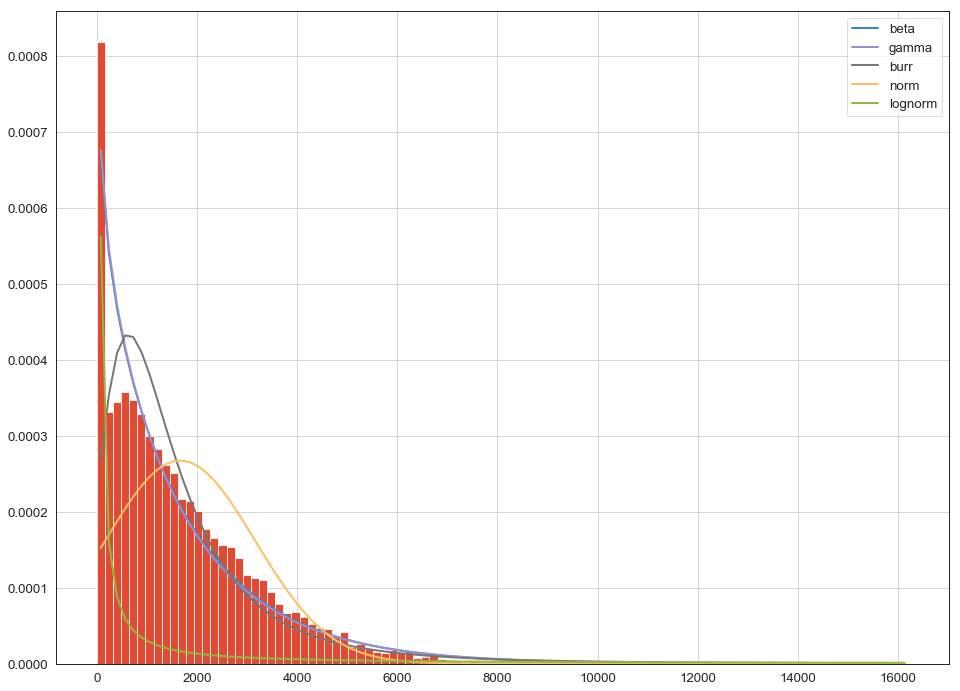

In [36]:
f = Fitter(distance2,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
burr,2130.314270,-877399.949526,inf,0.000048
lognorm,2179.709866,-868599.473092,inf,0.000059
beta,2955.627604,-824004.905495,inf,0.000169
norm,5585.765856,-749534.553828,inf,0.000970
gamma,38367.634139,-738361.171767,inf,0.001260


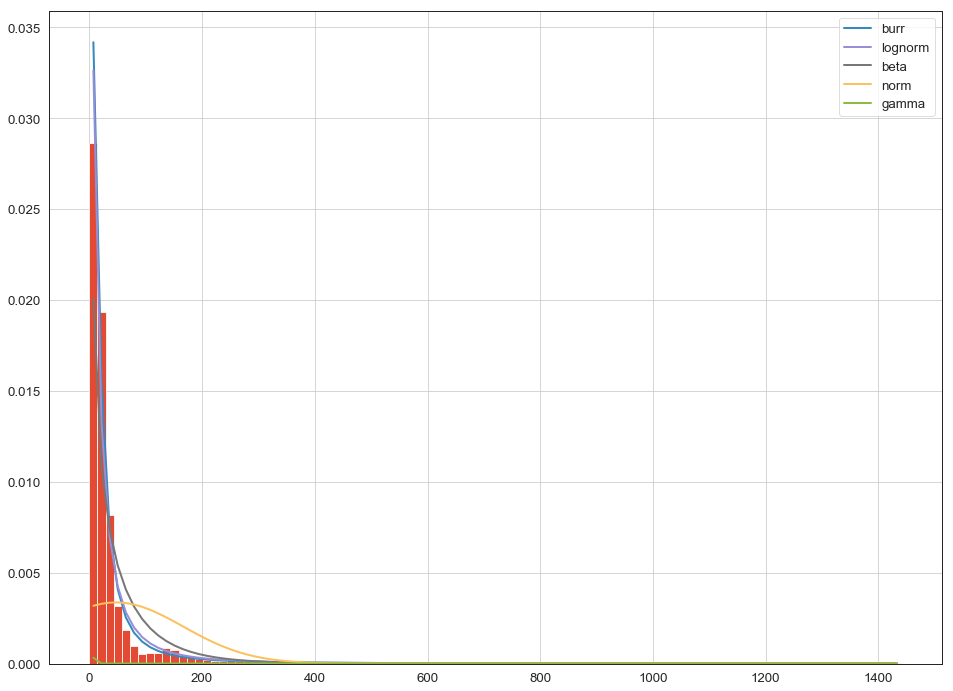

In [37]:
f = Fitter(rides2,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()